In [30]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

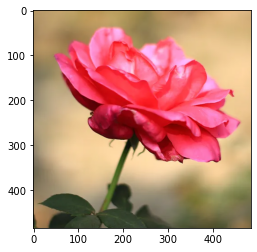

In [32]:
img = cv2.cvtColor(cv2.imread('rose.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [33]:
img.shape

(485, 485, 3)

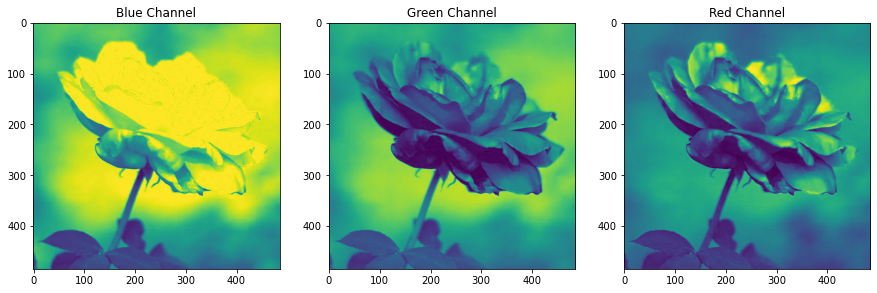

In [34]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [35]:
red_temp_df = pd.DataFrame(data = red)
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,475,476,477,478,479,480,481,482,483,484
0,100,100,100,100,101,101,101,101,102,102,...,133,132,132,131,131,127,127,126,125,127
1,100,100,100,100,101,101,101,101,102,102,...,133,132,132,131,131,127,127,126,125,127
2,100,100,100,100,101,101,101,101,102,102,...,133,132,132,131,131,127,127,126,125,127
3,100,100,100,100,101,101,101,101,102,102,...,133,132,132,131,131,127,127,126,125,127
4,100,100,100,100,101,101,101,101,102,102,...,132,131,131,130,130,127,127,126,125,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,25,27,35,37,44,49,52,60,76,83,...,73,72,71,71,69,69,67,67,66,64
481,28,26,27,24,41,43,46,52,69,76,...,71,72,71,71,69,69,67,67,66,64
482,45,36,29,25,32,36,40,47,58,69,...,71,72,71,71,69,69,67,67,66,64
483,60,50,38,27,33,32,35,40,48,64,...,71,72,71,71,69,69,67,67,66,64


In [36]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [37]:
pca_b = PCA(n_components=5)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=5)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=5)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [38]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(485, 5)
(485, 5)
(485, 5)


In [39]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.8894951224097568
Green Channel: 0.8293683780443903
Red Channel  : 0.7308754897970136


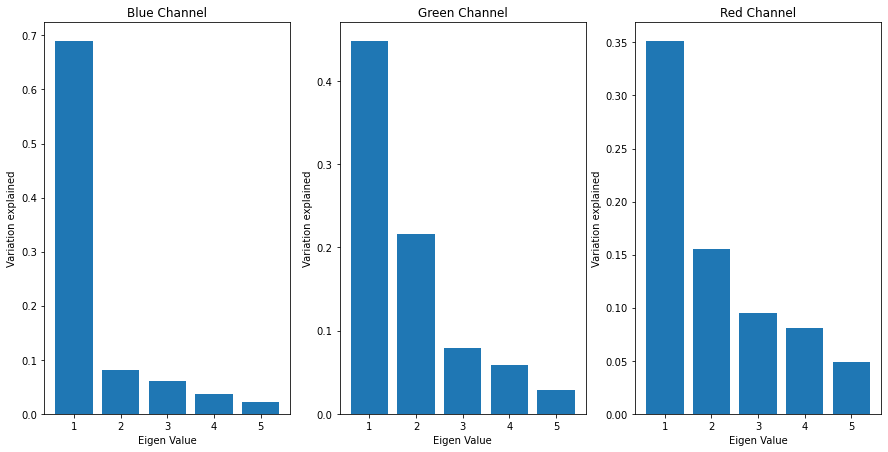

In [40]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,6)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,6)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,6)),pca_r.explained_variance_ratio_)
plt.show()

In [41]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(485, 485) (485, 485) (485, 485)


In [42]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(485, 485, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


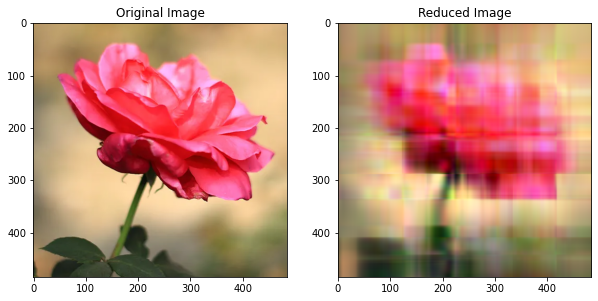

In [43]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [44]:
from matplotlib.image import imread

In [45]:
img = imread('rose.jpg')

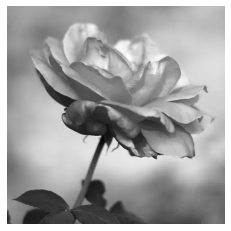

In [46]:
X = np.mean(img, -1)
A = plt.imshow(X)
A.set_cmap('gray')
plt.axis('off')
plt.show()

In [47]:
u, s, vh = np.linalg.svd(X, full_matrices=False)

In [48]:
u.shape, s.shape, vh.shape

((485, 485), (485,), (485, 485))

In [49]:
s = np.diag(s)
X_approx = u[:,:5]@s[:5,:5]@vh[:5,:]

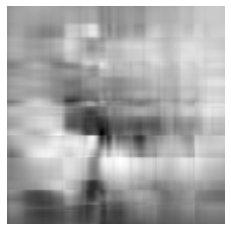

In [50]:
A = plt.imshow(X_approx)
A.set_cmap('gray')
plt.axis('off')
plt.show()

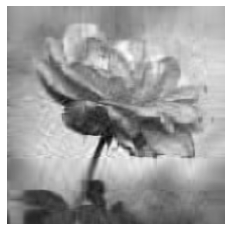

In [51]:
X_approx = u[:,:20]@s[:20,:20]@vh[:20,:]
A = plt.imshow(X_approx)
A.set_cmap('gray')
plt.axis('off')
plt.show()

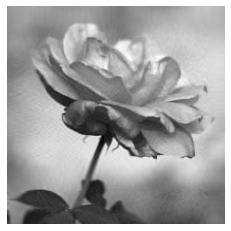

In [52]:
X_approx = u[:,:50]@s[:50,:50]@vh[:50,:]
A = plt.imshow(X_approx)
A.set_cmap('gray')
plt.axis('off')
plt.show()

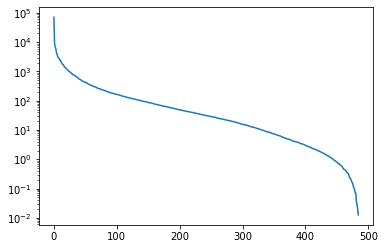

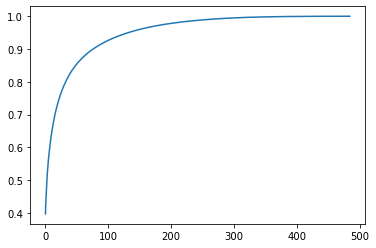

In [53]:
plt.figure(1)
plt.semilogy(np.diag(s))
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(s)/np.sum(np.diag(s))))
plt.show()

In [54]:
w, v = np.linalg.eig(X)
w, v

(array([ 6.87058167e+04+0.00000000e+00j, -4.61096944e+03+0.00000000e+00j,
        -3.70140562e+03+0.00000000e+00j, -1.89489646e+03+2.82592610e+03j,
        -1.89489646e+03-2.82592610e+03j,  1.89481197e+03+1.39168909e+03j,
         1.89481197e+03-1.39168909e+03j,  1.00151542e+03+1.79102788e+03j,
         1.00151542e+03-1.79102788e+03j,  1.91368219e+03+4.65618290e+02j,
         1.91368219e+03-4.65618290e+02j, -1.78080037e+03+0.00000000e+00j,
        -4.06192897e+02+1.25933928e+03j, -4.06192897e+02-1.25933928e+03j,
        -1.15992940e+03+5.36757022e+02j, -1.15992940e+03-5.36757022e+02j,
         4.91083309e+02+8.28567066e+02j,  4.91083309e+02-8.28567066e+02j,
         3.26555504e+02+8.28481956e+02j,  3.26555504e+02-8.28481956e+02j,
         7.90554347e+02+9.00952988e+01j,  7.90554347e+02-9.00952988e+01j,
        -2.12884558e+02+7.32863270e+02j, -2.12884558e+02-7.32863270e+02j,
         1.75178380e+02+6.97174999e+02j,  1.75178380e+02-6.97174999e+02j,
        -6.41042009e+02+0.00000000e+00